In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import plotly.express as px  
csv_path = 'data/2021.csv' 

df = pd.read_csv(csv_path) 

df.head() # view the first 5 rows of our DataFrame

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,0,Jonathan Taylor*+,IND,RB,22,17,17,51.0,40.0,0.0,...,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0
1,1,Cooper Kupp*+,LAR,WR,28,17,17,191.0,145.0,0.0,...,1.0,18.0,0.0,4.0,1947.0,16.0,295.0,0.0,0.0,0.0
2,2,Deebo Samuel*+,SFO,WR,25,16,15,121.0,77.0,24.0,...,2.0,365.0,8.0,59.0,1405.0,6.0,262.0,0.0,4.0,2.0
3,3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,...,646.0,763.0,6.0,122.0,0.0,0.0,403.0,15.0,8.0,3.0
4,4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,...,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0


In [4]:
# shape is an attribute that tells us the shape of our DataFrame in the format (rows, columns)
print(df.shape)
print('We have', df.shape[0], 'players we can analyze for the 2021 season')
print('We have', df.shape[1], 'columns of data we can analyze for the 2021 season')


(671, 21)
We have 671 players we can analyze for the 2021 season
We have 21 columns of data we can analyze for the 2021 season


In [5]:
# Viewing Columns
df.columns

Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Tgt', 'Rec',
       'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds', 'RushingTD',
       'RushingAtt', 'ReceivingYds', 'ReceivingTD', 'FantasyPoints', 'Int',
       'Fumbles', 'FumblesLost'],
      dtype='object')

# 2021 Running Back Data 

In [32]:
# RBs by usage // Creating separate Running Back DF 
rb_df = df.loc[df['Pos'] == 'RB', ['Player', 'Tgt', 'RushingAtt', 'RushingTD',  'ReceivingTD','FantasyPoints']]
rb_df['Usage'] = df['Tgt'] + df['RushingAtt']
rb_df['Touchdowns'] = df['RushingTD'] + df['ReceivingTD']

In [33]:
rb_df.head(10) #RBs for 2021

,Player,Tgt,RushingAtt,RushingTD,ReceivingTD,FantasyPoints,Usage,Touchdowns
0,Jonathan Taylor*+,51.0,332.0,18.0,2.0,333.0,383.0,20.0
4,Austin Ekeler,94.0,206.0,12.0,8.0,274.0,300.0,20.0
10,Joe Mixon*,48.0,292.0,13.0,3.0,246.0,340.0,16.0
13,Najee Harris*,94.0,307.0,7.0,3.0,227.0,401.0,10.0
15,James Conner*,39.0,202.0,15.0,3.0,221.0,241.0,18.0
21,Ezekiel Elliott,65.0,237.0,10.0,2.0,205.0,302.0,12.0
23,Nick Chubb*,25.0,228.0,8.0,1.0,195.0,253.0,9.0
27,Damien Harris,21.0,202.0,15.0,0.0,192.0,223.0,15.0
31,Alvin Kamara*,67.0,240.0,4.0,5.0,188.0,307.0,9.0
32,Antonio Gibson,52.0,258.0,7.0,3.0,187.0,310.0,10.0


In [22]:
# Ranking the Usage Column
rb_df['UsageRank'] = rb_df['Usage'].rank(ascending=False)

rb_df['FantasyPointsRank'] = rb_df['FantasyPoints'].rank(ascending=False)

rb_df.sort_values(by='UsageRank').head(10)

,Player,Tgt,RushingAtt,RushingTD,FantasyPoints,Usage,UsageRank,FantasyPointsRank
13,Najee Harris*,94.0,307.0,7.0,227.0,401.0,1.0,4.0
0,Jonathan Taylor*+,51.0,332.0,18.0,333.0,383.0,2.0,1.0
10,Joe Mixon*,48.0,292.0,13.0,246.0,340.0,3.0,3.0
32,Antonio Gibson,52.0,258.0,7.0,187.0,310.0,4.0,10.5
31,Alvin Kamara*,67.0,240.0,4.0,188.0,307.0,5.0,9.0
21,Ezekiel Elliott,65.0,237.0,10.0,205.0,302.0,6.0,6.0
4,Austin Ekeler,94.0,206.0,12.0,274.0,300.0,7.0,2.0
45,Dalvin Cook*,49.0,249.0,6.0,172.0,298.0,8.0,15.5
46,Josh Jacobs,64.0,217.0,9.0,172.0,281.0,9.0,15.5
68,David Montgomery,51.0,225.0,7.0,153.0,276.0,10.0,20.0


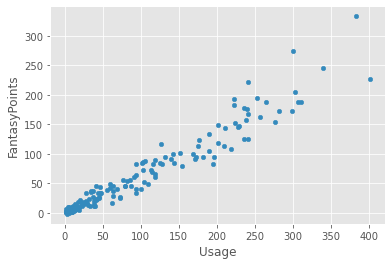

In [23]:
# Basic Plotting 
from matplotlib import pyplot as plt

plt.style.use('ggplot')

rb_df.plot(x='Usage', y='FantasyPoints', kind='scatter')

# 2021 Wide Receiver Data

In [10]:
# Creating Wide Reciever DF 
wr_df = df.loc[df['Pos'] == 'WR', ['Player', 'Tgt', 'Rec', 'ReceivingYds', 'FantasyPoints']]
wr_df['Usage'] = df['Tgt'] + df['Rec']

In [11]:
wr_df.head(20)

,Player,Tgt,Rec,ReceivingYds,FantasyPoints,Usage
1,Cooper Kupp*+,191.0,145.0,1947.0,295.0,336.0
2,Deebo Samuel*+,121.0,77.0,1405.0,262.0,198.0
8,Ja'Marr Chase*,128.0,81.0,1455.0,224.0,209.0
9,Justin Jefferson*,167.0,108.0,1616.0,222.0,275.0
11,Davante Adams*+,169.0,123.0,1553.0,221.0,292.0
16,Mike Evans*,114.0,74.0,1035.0,189.0,188.0
18,Tyreek Hill*,159.0,111.0,1239.0,186.0,270.0
20,Stefon Diggs*,164.0,103.0,1225.0,183.0,267.0
24,Mike Williams,129.0,76.0,1146.0,171.0,205.0
25,D.K. Metcalf,129.0,75.0,967.0,169.0,204.0


In [12]:
wr_df['UsageRank'] = wr_df['Usage'].rank(ascending=False)

wr_df['FantasyPointsRank'] = wr_df['FantasyPoints'].rank(ascending=False)

wr_df.sort_values(by='UsageRank').head(10)

,Player,Tgt,Rec,ReceivingYds,FantasyPoints,Usage,UsageRank,FantasyPointsRank
1,Cooper Kupp*+,191.0,145.0,1947.0,295.0,336.0,1.0,1.0
11,Davante Adams*+,169.0,123.0,1553.0,221.0,292.0,2.0,5.0
29,Diontae Johnson*,169.0,107.0,1161.0,167.0,276.0,3.0,12.0
9,Justin Jefferson*,167.0,108.0,1616.0,222.0,275.0,4.0,4.0
18,Tyreek Hill*,159.0,111.0,1239.0,186.0,270.0,5.0,7.0
20,Stefon Diggs*,164.0,103.0,1225.0,183.0,267.0,6.0,8.0
42,Keenan Allen*,157.0,106.0,1138.0,152.0,263.0,7.0,15.0
50,D.J. Moore,163.0,93.0,1157.0,145.0,256.0,8.0,17.5
54,Jaylen Waddle,140.0,104.0,1015.0,142.0,244.0,9.0,20.5
63,Marquise Brown,146.0,91.0,1008.0,135.0,237.0,10.0,25.5


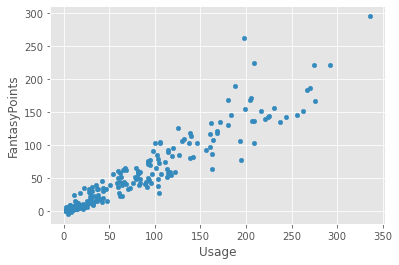

In [13]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

wr_df.plot(x='Usage', y='FantasyPoints', kind='scatter')

# 2021 Tight End Data 

In [14]:
# RBs by usage // Creating separate Running Back DF 
TE_df = df.loc[df['Pos'] == 'TE', ['Player', 'Tgt', 'Rec', 'ReceivingYds', 'FantasyPoints']]
TE_df['Usage'] = df['Tgt'] + df['Rec']

In [15]:
TE_df.head(10)

,Player,Tgt,Rec,ReceivingYds,FantasyPoints,Usage
7,Mark Andrews*+,153.0,107.0,1361.0,194.0,260.0
14,Travis Kelce*,134.0,92.0,1125.0,171.0,226.0
34,Dalton Schultz,104.0,78.0,808.0,131.0,182.0
36,George Kittle*,94.0,71.0,910.0,127.0,165.0
47,Rob Gronkowski,89.0,55.0,802.0,116.0,144.0
49,Dawson Knox,71.0,49.0,587.0,115.0,120.0
52,Hunter Henry,75.0,50.0,603.0,114.0,125.0
56,Dallas Goedert,76.0,56.0,830.0,109.0,132.0
58,Kyle Pitts*,110.0,68.0,1026.0,109.0,178.0
61,Zach Ertz,112.0,74.0,763.0,107.0,186.0


In [16]:
# Ranking the Usage Column
TE_df['UsageRank'] = TE_df['Usage'].rank(ascending=False)

TE_df['FantasyPointsRank'] = TE_df['FantasyPoints'].rank(ascending=False)

TE_df.sort_values(by='UsageRank').head(10)

,Player,Tgt,Rec,ReceivingYds,FantasyPoints,Usage,UsageRank,FantasyPointsRank
7,Mark Andrews*+,153.0,107.0,1361.0,194.0,260.0,1.0,1.0
14,Travis Kelce*,134.0,92.0,1125.0,171.0,226.0,2.0,2.0
61,Zach Ertz,112.0,74.0,763.0,107.0,186.0,3.0,10.0
73,Mike Gesicki,112.0,73.0,780.0,92.0,185.0,4.0,11.5
34,Dalton Schultz,104.0,78.0,808.0,131.0,182.0,5.0,3.0
58,Kyle Pitts*,110.0,68.0,1026.0,109.0,178.0,6.0,8.5
36,George Kittle*,94.0,71.0,910.0,127.0,165.0,7.0,4.0
138,Noah Fant,90.0,68.0,670.0,91.0,158.0,8.0,13.0
196,Cole Kmet,93.0,60.0,612.0,61.0,153.0,9.0,22.0
169,Darren Waller,93.0,55.0,665.0,79.0,148.0,10.5,17.5


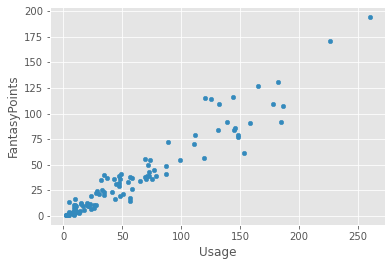

In [17]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

TE_df.plot(x='Usage', y='FantasyPoints', kind='scatter')

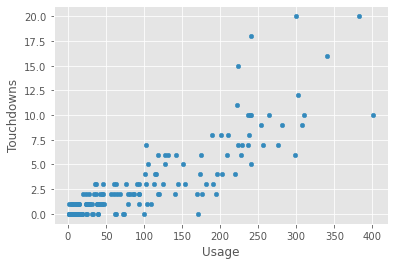

In [36]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

rb_df.plot(x='Usage', y='Touchdowns', kind='scatter')

In [34]:
rb_fps = rb_df.loc[rb_df['FantasyPoints'] >= 50]
fig = px.bar(rb_fps, x="Usage", y="Touchdowns", orientation='h', height=400, hover_data=["Player", "FantasyPoints"],
             title='RBs')
fig.show()
